## Pivoting & Pivot Tables

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\pandas\Python Pandas Tutorials\Covid_India.csv")
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


#### DataFrame.pivot_table(values, column_index)

In [3]:
df.pivot_table(values='Total Confirmed cases', index='Name of State / UT', aggfunc=np.mean)

,Total Confirmed cases
Name of State / UT,
Andaman and Nicobar Islands,9.000000
Andhra Pradesh,104.242424
Arunachal Pradesh,1.000000
Assam,22.230769
Bihar,24.347826
Chandigarh,12.958333
Chhattisgarh,7.961538
Delhi,186.581395
Goa,5.631579


In [4]:
# Another feature provided by the Pivot function 
# is that we can add "All" (see last line) which gives the mean of all

df.pivot_table(values='Total Confirmed cases', index='Name of State / UT', aggfunc=np.mean, margins=True)

,Total Confirmed cases
Name of State / UT,
Andaman and Nicobar Islands,9.000000
Andhra Pradesh,104.242424
Arunachal Pradesh,1.000000
Assam,22.230769
Bihar,24.347826
Chandigarh,12.958333
Chhattisgarh,7.961538
Delhi,186.581395
Goa,5.631579


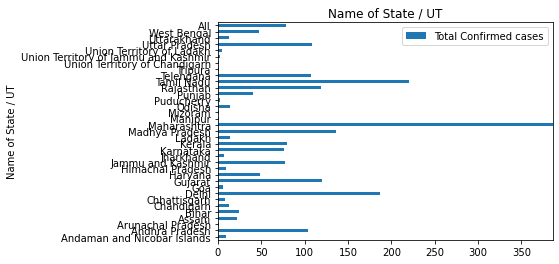

In [5]:
# Can be useful when creating a plot

Cases_per_state = df.pivot_table(values='Total Confirmed cases', index='Name of State / UT', aggfunc=np.mean, margins=True)

# We push the horizontal scale to the right just to make it more aesthetic
max_val = Cases_per_state["Total Confirmed cases"].max()

Cases_per_state.plot(kind='barh', title='Name of State / UT', xlim=(0,max_val), legend=True)

#### Format for aggregating multiple columns of data
###### DataFrame.pivot_table([column1_values, column2_values], column_index)

In [6]:
# Now let's aggregate multiple columns

df.pivot_table(['Total Confirmed cases', 'Death'], 'Name of State / UT')

,Death,Total Confirmed cases
Name of State / UT,,
Andaman and Nicobar Islands,0.000000,9.000000
Andhra Pradesh,1.242424,104.242424
Arunachal Pradesh,0.000000,1.000000
Assam,0.230769,22.230769
Bihar,1.000000,24.347826
Chandigarh,0.000000,12.958333
Chhattisgarh,0.000000,7.961538
Delhi,3.302326,186.581395
Goa,0.000000,5.631579


In [7]:
# Aggregating with multiple functions on multiple columns

df.pivot_table(['Total Confirmed cases', 'Death'], 'Name of State / UT', aggfunc=[np.mean, np.min, np.max], margins=True)

mean                        amin  \
                                          Death Total Confirmed cases Death   
Name of State / UT                                                            
Andaman and Nicobar Islands            0.000000              9.000000     0   
Andhra Pradesh                         1.242424            104.242424     0   
Arunachal Pradesh                      0.000000              1.000000     0   
Assam                                  0.230769             22.230769     0   
Bihar                                  1.000000             24.347826     1   
Chandigarh                             0.000000             12.958333     0   
Chhattisgarh                           0.000000              7.961538     0   
Delhi                                  3.302326            186.581395     0   
Goa                                    0.000000              5.631579     0   
Gujarat                                8.040000            120.000000     0   
Haryana                                0.487805             48.048780     0   
Himachal Pradesh                       0.875000              9.416667     0   
Jammu and Kashmir                      1.833333             77.166667     0   
Jharkhand                              0.384615              6.615385     0   
Karnataka                              2.361111             76.166667     0   
Kerala                                 0.386667             79.266667     0   
Ladakh                                 0.000000             13.625000     0   
Madhya Pradesh                         8.458333            136.041667     0   
Maharashtra                           23.305556            386.166667     0   
Manipur                                0.000000              1.476190     0   
Mizoram                                0.000000              1.000000     0   
Odisha                                 0.206897             13.482759     0   
Puducherry                             0.000000              2.851852     0   
Punjab                                 2.888889             40.638889     0   
Rajasthan                              0.500000            118.809524     0   
Tamil Nadu                             1.973684            220.526316     0   
Telengana                              2.000000            107.860465     0   
Tripura                                0.000000              1.285714     0   
Union Territory of Chandigarh          0.000000              1.000000     0   
Union Territory of Jammu and Kashmir   0.000000              2.166667     0   
Union Territory of Ladakh              0.000000              4.142857     0   
Uttar Pradesh                          0.975610            108.073171     0   
Uttarakhand                            0.000000             12.700000     0   
West Bengal                            2.250000             47.750000     0   
All                                    2.221980             78.865071     0   

                                                            amax  \
                                     Total Confirmed cases Death   
Name of State / UT                                                 
Andaman and Nicobar Islands                              1     0   
Andhra Pradesh                                           1     7   
Arunachal Pradesh                                        1     0   
Assam                                                    1     1   
Bihar                                                    2     1   
Chandigarh                                               1     0   
Chhattisgarh                                             1     0   
Delhi                                                    1    24   
Goa                                                      3     0   
Gujarat                                                  2    25   
Haryana                                                 14     3   
Himachal Pradesh                                         2     1   
Jammu and Kashmir   